In [22]:
import math

def ev_to_wavelength(eV):
    # Constants
    h = 6.62607004e-34  # Planck's constant in joule-seconds
    c = 299792458       # Speed of light in meters per second

    # Convert eV to joules
    joules = eV * 1.60218e-19

    # Calculate wavelength in meters
    wavelength = h * c / joules

    # Convert meters to nanometers
    wavelength_nm = wavelength *1e9

    return wavelength_nm


In [43]:
print(ev_to_wavelength(7.1))
print(ev_to_wavelength(7.1-0.4)-ev_to_wavelength(7.1+0.4))

print(ev_to_wavelength(9.8))
print(ev_to_wavelength(9.8-0.4)-ev_to_wavelength(9.8+0.4))

174.62526182827293
19.738736063374944
126.5142203041569
10.344925815442139


In [36]:
import math

def angular_frequency_to_wavelength(angular_frequency_cm):
    speed_of_light_cm_s = 2.998e10  # centimeters per second
    angular_frequency_hz = angular_frequency_cm * speed_of_light_cm_s  # in Hz
    
    speed_of_light_m = 299792458  # meters per second
    wavelength_nm = 2 * math.pi * speed_of_light_m / angular_frequency_hz  # in nanometers
    return wavelength_nm


In [37]:
print(angular_frequency_to_wavelength(323))

0.00019452096726082127


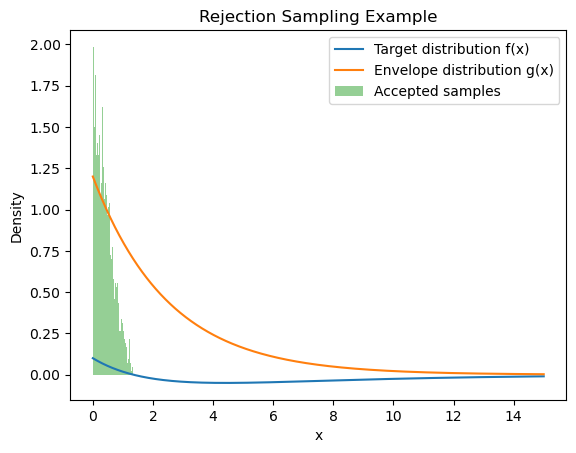

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution f(x)
def f(x):
    return 0.3 * np.exp(-0.5 * x) - 0.2 * np.exp(-0.2 * x)

# Define the envelope distribution g(x)
def g(x):
    return 1.2 * np.exp(-0.4 * x)

# Define the constant c
c = 1.25

# Initialize an empty array to store the accepted samples
samples = []

# Set the maximum number of iterations
max_iters = 100000

# Generate samples using the rejection sampling algorithm
for i in range(max_iters):
    # Generate a sample from the envelope distribution g(x)
    x = np.random.exponential(1/0.4)
    
    # Generate a uniform random number u in the interval [0, 1]
    u = np.random.uniform(0, 1)
    
    # Accept or reject the sample based on u and the constant c
    if u * c * g(x) <= f(x):
        samples.append(x)

# Plot the target distribution f(x)
x = np.linspace(0, 15, 1000)
plt.plot(x, f(x), label='Target distribution f(x)')

# Plot the envelope distribution g(x)
plt.plot(x, g(x), label='Envelope distribution g(x)')

# Plot the accepted samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Accepted samples')

# Set the plot title and labels
plt.title('Rejection Sampling Example')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


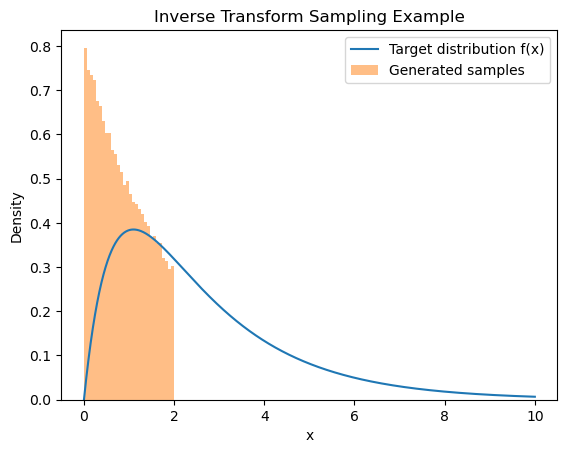

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the distribution
a = 0.5
b = 1.5

# Define the CDF of the distribution
def cdf(x):
    return ((1/np.exp(-a*x)) - (1/np.exp(-b*x))) / (b-a)

# Generate random samples using inverse transform sampling
num_samples = 100000
u = np.random.uniform(0, 1, num_samples)
samples = -np.log(1 - (u*(1-np.exp(-(b-a))))) / a

# Plot the target distribution f(x)
x = np.linspace(0, 10, 10000)
plt.plot(x, np.exp(-a*x) - np.exp(-b*x), label='Target distribution f(x)')

# Plot the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated samples')

# Set the plot title and labels
plt.title('Inverse Transform Sampling Example')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


Number of rejected samples:  0


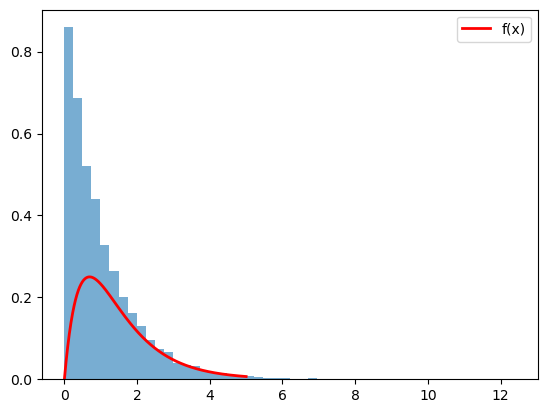

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, b):
    return np.exp(-a*x) - np.exp(-b*x)

def max_f(a, b):
    return max(1.0, (b-a)/(a*b))

a = 1.0
b = 2.0
M = max_f(a, b)

num_samples = 10000
num_rejects = 0
samples = []

while len(samples) < num_samples:
    x = np.random.exponential(scale=1/a)
    y = np.random.uniform(0, M*f(x, a, b))
    if y <= f(x, a, b):
        samples.append(x)
    else:
        num_rejects += 1

print("Number of rejected samples: ", num_rejects)

plt.hist(samples, bins=50, density=True, alpha=0.6)
x = np.linspace(0, 5, 1000)
plt.plot(x, f(x, a, b), 'r-', lw=2, label='f(x)')
plt.legend()
plt.show()
